In [5]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib import font_manager, rc


In [6]:
raw = pd.read_csv('Data/kospi.csv', encoding = 'cp949')

# 전처리

In [7]:
raw.head()

,일자,현재지수,대비,등락률(%),배당수익률(%),주가이익비율,주가자산비율,시가지수,고가지수,저가지수,거래량(천주),거래대금(백만원),상장시가총액(백만원)
0,1980/01/04,100.00,NaN,-,0.0,0.0,0.0,NaN,NaN,NaN,96,603,NaN
1,1980/01/05,100.15,NaN,-,0.0,0.0,0.0,NaN,NaN,NaN,131,776,NaN
2,1980/01/07,102.53,NaN,-,0.0,0.0,0.0,NaN,NaN,NaN,358,"2,030",NaN
3,1980/01/08,105.28,NaN,-,0.0,0.0,0.0,NaN,NaN,NaN,796,"5,567",NaN
4,1980/01/09,106.37,NaN,-,0.0,0.0,0.0,NaN,NaN,NaN,552,"3,706",NaN


In [8]:
raw.dtypes

일자              object
현재지수            object
대비             float64
등락률(%)          object
배당수익률(%)       float64
주가이익비율         float64
주가자산비율         float64
시가지수            object
고가지수            object
저가지수            object
거래량(천주)         object
거래대금(백만원)       object
상장시가총액(백만원)     object
dtype: object

In [9]:
raw['일자'] = raw['일자'].apply(lambda x: x.replace('/','')).astype('int')

raw['현재지수'] = raw['현재지수'].apply(lambda x: x.replace(',','')).astype('float')

raw['등락률(%)'] = raw['현재지수'].pct_change().fillna(0) +1

raw = raw[['일자','현재지수','등락률(%)']]

In [10]:
raw.head()

,일자,현재지수,등락률(%)
0,19800104,100.00,1.000000
1,19800105,100.15,1.001500
2,19800107,102.53,1.023764
3,19800108,105.28,1.026821
4,19800109,106.37,1.010353


In [11]:
raw['GIJUN_MONTH'] = raw['일자'].apply(lambda x: x//100)

In [12]:
raw.tail()

,일자,현재지수,등락률(%),GIJUN_MONTH
10411,20180813,2248.45,0.984957,201808
10412,20180814,2258.91,1.004652,201808
10413,20180816,2240.80,0.991983,201808
10414,20180817,2247.05,1.002789,201808
10415,20180820,2247.88,1.000369,201808


# MCS를위한 기초 data 생성

In [13]:
column_list = ['GIJUN_MONTH','SILH_SUIK_RT','KOSPI(월초)','KOSPI(월말)']
data = DataFrame(columns = column_list)

# 월초
jisu1_list = []

#월말
jisu2_list = []

month_list = []
suik_list = []

for month in raw['GIJUN_MONTH'].unique():
    temp = raw[raw['GIJUN_MONTH'] == month]
    
    # 2018년 8월 자료는 제외
    if month == 201808: continue
    
    # 월 기록
    month_list.append(month)
    
    # 월초 주가 기록
    jisu1_list.append(temp['현재지수'].iloc[0])
    
    # 월말 주가 기록
    jisu2_list.append(temp['현재지수'].iloc[-1])
    
    # 월 수익률 기록
    suik_list.append(np.prod(temp['등락률(%)']))
    
    
    
data['GIJUN_MONTH'] = month_list
data['SILH_SUIK_RT'] = suik_list
data['KOSPI(월초)'] = jisu1_list
data['KOSPI(월말)'] = jisu2_list

In [14]:
data

,GIJUN_MONTH,SILH_SUIK_RT,KOSPI(월초),KOSPI(월말)
0,198001,1.058900,100.00,105.89
1,198002,0.979696,104.48,103.74
2,198003,1.012146,103.96,105.00
3,198004,1.105619,105.43,116.09
4,198005,1.002929,116.54,116.43
5,198006,0.967276,116.77,112.62
6,198007,1.000799,112.05,112.71
7,198008,0.999468,112.28,112.65
8,198009,0.979583,112.55,110.35
9,198010,0.957952,109.85,105.71


In [15]:
data.to_csv('RAW_DATA.csv')

# 평균 0.95% (월) , 표준편차 : real data (월 7.53%)로 수익률 구간 generate 

In [23]:
rt_monthly = data['SILH_SUIK_RT'].mean()
rt_monthly

1.009548768590341

In [16]:
std_monthly = data['SILH_SUIK_RT'].std()
std_monthly

0.07565703787250408

In [26]:
suik_series = Series(np.random.normal(loc = rt_monthly, scale= std_monthly, size = 10000))

In [27]:
np.mean(suik_series)

1.0099857165727764

In [28]:
np.std(suik_series)

0.07500913429439209

# 시뮬레이션 시작

In [29]:
from collections import OrderedDict
from sympy import Symbol, solve

for n_period in [12,24,36]:
    
    investment = 10000
    total_investment = n_period * investment

    rf_annual = 0.03
    rf_monthly = np.power(1+rf_annual, 1/12) -1



    store_dict = OrderedDict(\
                             {
                              '전체 시나리오' : [],
                              '메인 시나리오' : [],
                              '세부 시나리오' : [],

                              'LS 수익률(%)' : [],
                              'BH 수익률(%)' : [],
                              'DCA1 수익률(%)' : [],
                              'DCA1* 수익률(%)' : [],
        
                              'P_0' : [],
                              'P_T' : [],
                              'H_DCA1' : [],
                              'H_DCA1*' : [],

                              })
    for i in range(10000):
    
        temp = Series(np.random.normal(loc = rt_monthly, scale= std_monthly, size = n_period))

        # full year가 아니면 제외
        if not len(temp) == n_period:
            continue

        # 최초시점 KOSPI 기록
        kospi_0 = 1

        # 중간시점 KOSPI 기록
        kospi_05 = temp.iloc[:n_period//2].prod()


        # 마지막 시점 KOSPI 기록
        kospi_t = np.prod(temp)

        # state : 각각의 시나리오 (ex: 상상)를 기록할 변수
        total_senario = ''
        main_senario = ''
        sebu_senario = '' 

        ################ total_senario 계산 ##################
        for i in range(len(temp)):

            # t기간 수익률
            suik_t = np.prod(temp.iloc[:i])

            ##### 상, 하 state 기록
            if suik_t >= 1:
                total_senario += '상'
            else:
                total_senario += '하'

        # total senario = xxxxxxxxxxxx (x : n_period)
        store_dict['전체 시나리오'].append(total_senario)

        ######################## 메인 시나리오 계산 ###########################

        up = 0
        down = 0

        for letter in total_senario:
            if letter == '상':
                up += 1
            elif letter == '하':
                down += 1

        # 메인 시나리오 계산
        # up이 절반 이상이면
        if up > n_period/2 :
            main_senario += '강'

        elif down > n_period/2 :
            main_senario += '약'

        elif up == n_period/2 :
            if kospi_t >= kospi_0:
                main_senario += '강'

            elif kospi_t < kospi_0:
                main_senario += '약'


        store_dict['메인 시나리오'].append(main_senario)



        ############################ 세부 시나리오 계산 ############################
        # 전기 (최초 n_period/2 개월) 
        up = 0
        down = 0

        for letter in total_senario[:n_period//2]:
            if letter == '상':
                up += 1
            elif letter == '하':
                down += 1          

        if up > n_period/4 :
            sebu_senario += '강'

        if down > n_period/4 :
            sebu_senario += '약'

        if up == n_period/4 :
            if kospi_05 >= kospi_0:
                sebu_senario += '강'

            elif kospi_05 < kospi_0:
                sebu_senario += '약'

        # 후기
        up = 0
        down = 0

        for letter in total_senario[n_period//2:]:
            if letter == '상':
                up += 1
            elif letter == '하':
                down += 1          

        if up > n_period/4 :
            sebu_senario += '강'

        if down > n_period/4 :
            sebu_senario += '약'

        if up == n_period/4 :
            if kospi_t >= kospi_05:
                sebu_senario += '강'
            elif kospi_t < kospi_05:
                sebu_senario += '약'


        store_dict['세부 시나리오'].append(sebu_senario)



        ################### P_0 , P_T 계산 ###############################
        P_0 = 1
        P_T = np.prod(temp)

        P_T_0 = P_T / P_0

        ###################### LS , BH 수익률 계산 ###################
        LS_HPR = P_T / P_0 -1  # HPR  0.xx 
        LS_annual = np.power(LS_HPR +1 , 12/n_period) -1 # annual 0.xxx

        BH_HPR = (total_investment/2 * (P_T/P_0) + 
                  total_investment/2 * np.power( 1+ rf_annual, 12/ n_period)) / total_investment -1


        BH_annual = np.power(BH_HPR +1, 12/n_period) -1

        store_dict['LS 수익률(%)'].append(round(LS_annual * 100,3))
        store_dict['BH 수익률(%)'].append(round(BH_annual * 100,3))




        ##################### DCA1 FV 계산 ########################
        FV_sum = 0

        for i in range(n_period):
            FV_sum += investment * np.prod(temp.iloc[i:])

        # FV_sum : 적립식 투자안의 미래가치의 총합
        FV_sum = np.round(FV_sum,2)

        #################### DCA1 수익률 계산 ########################
        DCA1_HPR = FV_sum / total_investment -1 # HPR 0.xxx
        DCA1_annual = np.power(DCA1_HPR +1, 12 / n_period) -1  # annual 0.xxx
        DCA1_monthly = np.power(DCA1_annual +1, 1/n_period) -1

        store_dict['DCA1 수익률(%)'].append(round(DCA1_annual * 100 , 3))




        ################### DCA1* 수익률 계산 ##########################
        irr_path = np.ones(n_period+1) * -investment
        irr_path[-1] += (FV_sum + investment)

        # DCA1_star : 월별 수익률
        # IRR_annual : 연환산 수익률
        DCA1_star_monthly = np.irr(irr_path)    # monthly 0. xxxx
        DCA1_star_HPR = np.power(DCA1_star_monthly +1 ,n_period) -1
        DCA1_star_annual = np.power(DCA1_star_monthly +1, 12) -1 # annual 0. xxx

        store_dict['DCA1* 수익률(%)'].append(np.round(DCA1_star_annual * 100,3))



        H_DCA1 = P_T / (1 + DCA1_HPR)
        H_DCA1_star = round(P_T / (1+ DCA1_star_HPR),5)

        store_dict['P_0'].append(1)
        store_dict['P_T'].append(P_T/ P_0)

        store_dict['H_DCA1'].append(H_DCA1/P_0)
        store_dict['H_DCA1*'].append(H_DCA1_star/P_0)



    # df 결과 값 저장 : DataFrame    
    df_DCA = DataFrame(store_dict)

    df_DCA.to_csv('모든 시나리오 %s개월 (MCS).csv'%n_period)

In [30]:
df_DCA.head()

,전체 시나리오,메인 시나리오,세부 시나리오,LS 수익률(%),BH 수익률(%),DCA1 수익률(%),DCA1* 수익률(%),P_0,P_T,H_DCA1,H_DCA1*
0,상하상하하상상상상상상상상상상상상상상상상상상상상상상상상상상상상상상상,강,강강,14.038,7.620,6.430,12.513,1,1.483033,1.230136,1.04122
1,상상상하상상상상상하하상상상상상상상상상상상상상상상상상상상상상상상상상,강,강강,32.918,18.857,16.943,32.971,1,2.348309,1.468341,0.99881
2,상상상상상하상상상상상상상상상상상상상상상상상상상상상상상상상상상상상상,강,강강,28.433,16.082,12.576,24.472,1,2.118520,1.484895,1.09856
3,상상상상상하하하하하하하하하하하하하하상상상상상상상상상상상상상상하하하,강,약강,-3.669,-1.629,-3.878,-7.546,1,0.893918,1.006537,1.13116
4,상상상상하하하하하하상상상상상상상상상상상상상상상상상상상상상상상상상상,강,강강,29.912,16.991,16.645,32.390,1,2.192565,1.381518,0.94491


In [73]:
df_DCA.T

,0,1,2,3,4,5,6,7,8,9,...,99979,99980,99981,99982,99983,99984,99985,99986,99987,99988
전체 시나리오,하상상상상상상상상상상상,하하하상상하하상하하하하,하상상상상상상상상상하하,하상상상하상상상하하하하,하하하하하하하하하하하하,하하하하하하하하하하하하,하하상하상하하하하하하하,하상상상하하하하하하하하,하하하하하하하하하하하하,하상하하하하하하하하하하,...,하하상상상하하하하상상상,하상상상하하상상상상상상,하하하하하하하하하하상하,하하하하하하하하하상상하,하하하하하상상상상상상상,하하상상상상상상상상상상,하상상상상상상상상상상상,하상상상상상상상상상상상,하상상상상상상상상상상상,하하하상상하하하하상상상
메인 시나리오,강,약,강,약,약,약,약,약,약,약,...,강,강,약,약,강,강,강,강,강,약
세부 시나리오,강강,약약,강강,강약,약약,약약,약약,약약,약약,약약,...,약강,강강,약약,약약,약강,강강,강강,강강,강강,약강
LS 수익률(%),-6.062,-10.058,-20.044,-20.524,-30.538,-25.909,-42.017,-41.63,-37.126,-36.221,...,18.331,16.877,-8.309,-6.098,2.826,13.224,26.604,26.575,14.685,11.149
BH 수익률(%),-1.531,-3.529,-8.522,-8.762,-13.769,-11.454,-19.508,-19.315,-17.063,-16.61,...,10.666,9.939,-2.655,-1.549,2.913,8.112,14.802,14.788,8.843,7.075
DCA1 수익률(%),-9.064,-8.346,-20.997,-18.926,-21.746,-16.173,-35.408,-32.298,-19.495,-18.9,...,18.473,9.102,-0.732,0.696,2.677,1.551,10.914,15.488,7.289,8.897
DCA1* 수익률(%),-16.29,-15.033,-36.275,-32.936,-37.469,-28.409,-57.832,-53.446,-33.858,-32.893,...,35.773,17.221,-1.349,1.287,4.979,2.877,20.747,29.778,13.727,16.825
DCA2 수익률(%),-7.82,-7.078,-19.898,-17.774,-20.616,-14.95,-34.463,-31.28,-18.262,-17.665,...,20.092,10.572,0.606,2.044,4.041,2.898,12.4,17.044,8.732,10.362
P_0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
P_T,0.939376,0.899419,0.79956,0.794762,0.694615,0.740914,0.579832,0.583705,0.628744,0.637794,...,1.18331,1.16877,0.916906,0.939019,1.02826,1.13224,1.26604,1.26575,1.14685,1.11149


# 수익률 그래프 그리기 및 왜도 첨도 계산

In [45]:
df_DCA = pd.read_csv('03. MCS/36.csv', encoding = 'cp949')

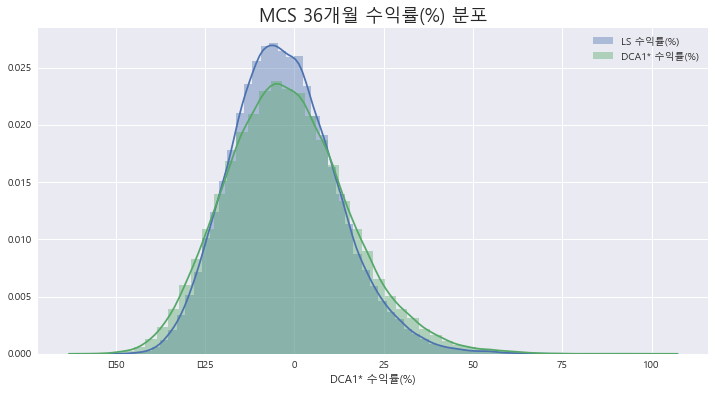

In [48]:
import seaborn as sns

plt.figure(figsize = (12,6))

for x in ['LS 수익률(%)', 'DCA1* 수익률(%)']:
    sns.distplot(df_DCA[x], label = x)
plt.legend(loc = 'best')
plt.title('MCS 36개월 수익률(%) 분포', fontsize = 18)

describe = df_DCA[['LS 수익률(%)', 'DCA1* 수익률(%)']].describe().T
describe['왜도'] = df_DCA[['LS 수익률(%)', 'DCA1* 수익률(%)']].skew(axis = 0)
describe['첨도'] = df_DCA[['LS 수익률(%)', 'DCA1* 수익률(%)']].kurtosis(axis = 0)
describe = describe.apply(lambda x: round(x,2))

In [49]:
describe

,count,mean,std,min,25%,50%,75%,max,왜도,첨도
LS 수익률(%),100000.0,-2.71,14.89,-47.06,-13.12,-3.57,6.68,70.56,0.42,0.39
DCA1* 수익률(%),100000.0,-1.95,17.20,-57.79,-13.96,-2.84,8.89,101.92,0.38,0.34


# 세부 시나리오

In [31]:
def summarize_by_senario(df, Total = True, **kwargs):
    main_senario_list = ['강', '약']

    column_list = ['메인 시나리오', '세부 시나리오', 'N', 
                   'P_0', 'P_T','H_DCA1', 'H_DCA1*',
                   
                   'DCA1 > LS', 'DCA1 > BH',
                   'DCA1* > LS', 'DCA1* > BH',

                   'H_DCA1 < P_T', 'H_DCA1* < P_T',

                   'LS 수익률(%)','BH 수익률(%)', 'DCA1 수익률(%)' , 'DCA1* 수익률(%)',
                   'LS 표준편차(%)', 'BH 표준편차(%)', 'DCA1 표준편차(%)', 'DCA1* 표준편차(%)' ,]
    
    for column in ['LS','BH','DCA1','DCA1*']:
        
        column_list.append(column + ' 왜도')
        column_list.append(column + ' 첨도')
        
        for name in [' min',' 1Q',' median', ' 3Q',' max']:
            column_list.append(column+name)
            
    
    
    
    
    store_dict = OrderedDict(\
                             dict((key , []) for key in column_list))

    # 결과 저장 DataFrame

    # 시나리오 기록
    
    if Total == True :
        store_dict['메인 시나리오'].append('전체')
        store_dict['세부 시나리오'].append('전체')
    
    elif Total == False:
        store_dict['메인 시나리오'].append(kwargs['main'])
        store_dict['세부 시나리오'].append(kwargs['sebu'])
    

    # N
    store_dict['N'].append(len(df))



    ################### # P_0 ,P_T , H_DCA1 , H_DCA1 ########################
    for column in ['P_0', 'P_T' , 'H_DCA1', 'H_DCA1*']:
        store_dict[column].append(df[column].mean())


    
    ################# [DCA 1*. DCA 2*] > [LS수익률(%), BH수익률(%)]######################
    for column in ['DCA1','DCA1*']:
        suik_column = column + ' 수익률(%)'

        DCA_win_LS_rate = np.sum(df['%s'%suik_column] > df['LS 수익률(%)']) / len(df)
        DCA_win_BH_rate = np.sum(df['%s'%suik_column] > df['BH 수익률(%)']) / len(df)

        store_dict['%s > LS'%column].append(DCA_win_LS_rate)
        store_dict['%s > BH'%column].append(DCA_win_BH_rate)




    ############### DCA1 , DCA1*, DCA2, DCA2*   > 0 (수익이 난 비율) #######################
    store_dict['H_DCA1 < P_T'].append(np.sum(df['H_DCA1'] < df['P_T']) / len(df))
    store_dict['H_DCA1* < P_T'].append( np.sum(df['H_DCA1*'] < df['P_T']) / len(df))


    #################### # LS, DCA , DCA1 수익률 기록 #######################################

    for column in ['LS', 'BH', 'DCA1', 'DCA1*']:
        
        #### 수익률 ####
        suik_column = column + ' 수익률(%)'
        store_dict[suik_column].append(df[suik_column].mean())
        
        #### 표준편차 ####
        std_column = column + ' 표준편차(%)'
        store_dict[std_column].append(df[suik_column].std())
        
        
        #### 분위수 계산 ####
        for cnt, name in enumerate([' min',' 1Q',' median',' 3Q',' max']):
            quartile = 25 * cnt # 0, 25, 50, 75, 100
            
            store_dict[column + name].append(np.percentile(a= df[suik_column], q=quartile))
        
        #### 왜도 첨도 계산 ####
        store_dict[column + ' 왜도'].append(df[suik_column].skew(axis = 0))
        store_dict[column + ' 첨도'].append(df[suik_column].kurtosis(axis = 0))
    
    
    return_df = DataFrame(store_dict)
    return return_df


In [33]:
from collections import OrderedDict

for n_period in [12,24,36]:
    
    df_DCA = pd.read_csv('03. MCS/모든 시나리오 %s개월 (MCS).csv'%n_period, encoding = 'utf-8')
    
    # 전체 요약
    summary_df = summarize_by_senario(df_DCA)


    # 세부 시나리오별 요약
    for main_senario in ['강','약']:
        temp = df_DCA[df_DCA['메인 시나리오'] == main_senario]

        # 강 보 합, 메인 시나리오 결과 총합
        main_summary_df = summarize_by_senario(temp, Total = False, main = main_senario, sebu = '전체')
        summary_df = pd.concat([summary_df, main_summary_df], axis=0, copy = False)
        sebu_senario_list = sorted(temp['세부 시나리오'].unique())

        for sebu_senario in sebu_senario_list:
            temp2 = temp[temp['세부 시나리오'] == sebu_senario]

            sebu_summary_df = summarize_by_senario(temp2, Total=False, main = main_senario, sebu = sebu_senario)
            summary_df = pd.concat([summary_df , sebu_summary_df], axis=0, copy = False)


    summary_df.set_index('메인 시나리오', inplace= True)
    
    summary_df.T.to_csv('시나리오별 통계_%s개월 (MCS).csv'%n_period)


In [34]:
summary_df.T

메인 시나리오,전체,강,강,강,강,약,약,약,약
세부 시나리오,전체,전체,강강,강약,약강,전체,강약,약강,약약
N,10000,6913,5676,374,863,3087,498,404,2185
P_0,1,1,1,1,1,1,1,1,1
P_T,1.41661,1.65876,1.73393,0.926976,1.48151,0.874338,0.827458,1.25721,0.814231
H_DCA1,1.1394,1.27329,1.32098,1.01325,1.07236,0.839568,0.91229,0.955302,0.801594
H_DCA1*,1.01974,1.08599,1.11542,1.17583,0.853458,0.871405,1.05847,0.79141,0.843561
DCA1 > LS,0.3284,0.0399248,0.00528541,0.352941,0.132097,0.974409,0.971888,0.846535,0.998627
DCA1 > BH,0.4508,0.336901,0.262333,0.280749,0.85168,0.705863,0.393574,0.873762,0.745995
DCA1* > LS,0.518,0.409952,0.348837,0.28877,0.864426,0.759961,0.435743,0.881188,0.811442
DCA1* > BH,0.6413,0.675683,0.664553,0.302139,0.910776,0.564302,0.305221,0.861386,0.568421


In [85]:
summary_df.T.to_csv('시나리오별 통계_%s개월.csv'%n_period)